# libraries

In [13]:
import pandas as pd
import numpy as np
import kaggle
import os
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
plt.style.use('ggplot')

In [2]:
!kaggle competitions download -c santander-customer-transaction-prediction

santander-customer-transaction-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
print(os.listdir('targetdir/'))

['sample_submission.csv', 'test.csv', 'train.csv']


In [4]:
# unizip data files
import zipfile
with zipfile.ZipFile("santander-customer-transaction-prediction.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

In [5]:
train = pd.read_csv('targetdir/train.csv')

In [6]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [89]:
def binary_target_plot(df, target):
    
    ax = sns.countplot(y= df[target], data=df)
    total = len(df)
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))

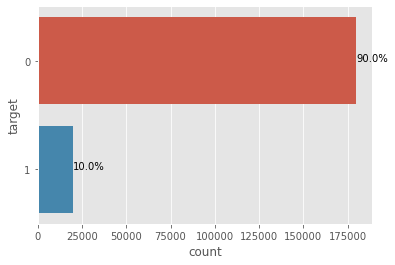

In [90]:
binary_target_plot(train, 'target')

In [124]:
descendent_corr = train.corr()[:1].transpose().sort_values(by='target', ascending=False)
descendent_corr = descendent_corr.reset_index()

In [125]:
descendent_corr

,index,target
0,target,1.000000
1,var_6,0.066731
2,var_110,0.064275
3,var_53,0.063399
4,var_26,0.062422
...,...,...
196,var_76,-0.061917
197,var_146,-0.063644
198,var_12,-0.069489
199,var_139,-0.074080


In [162]:
def bar_plot(df):
    with plt.style.context('dark_background'):
        plt.figure(figsize=(15, 6))

        sns.barplot(x='index', y='target', data=df, alpha=0.5, color='pink')
        plt.xticks(rotation=90)
        return plt.tight_layout()  

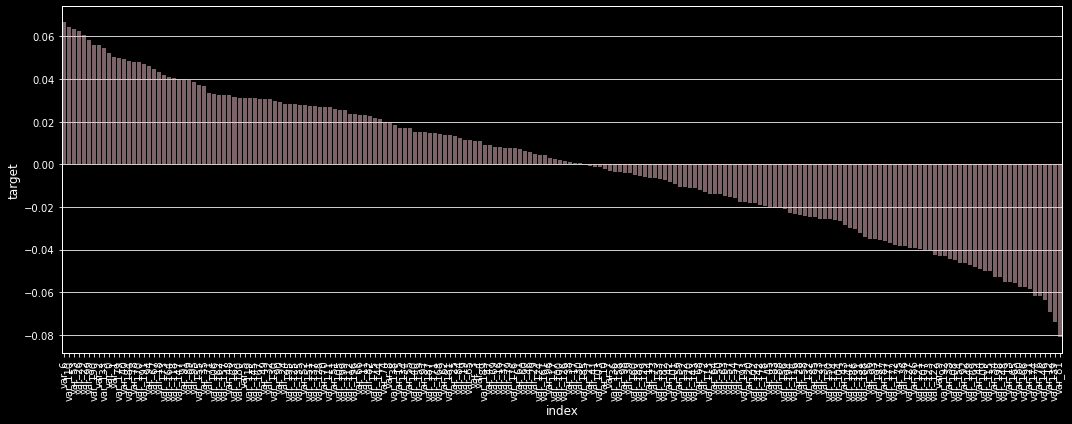

In [163]:
bar_plot(descendent_corr[1:])

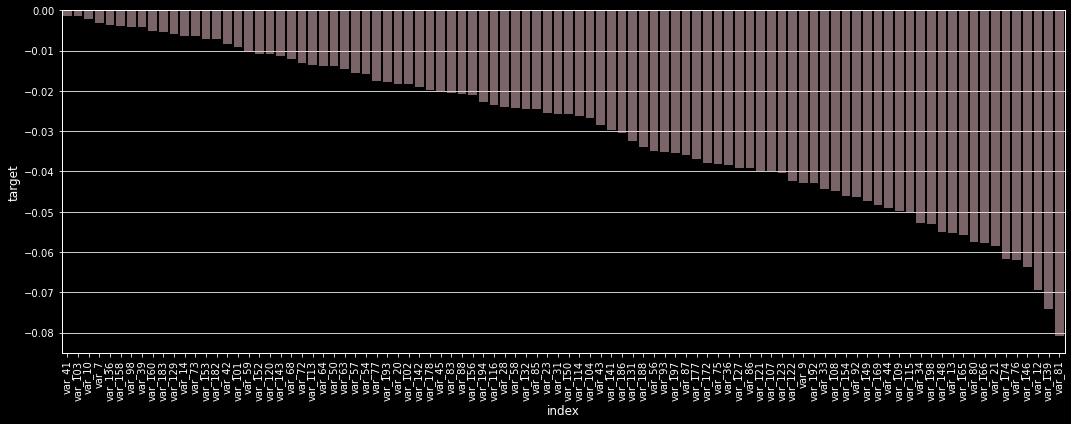

In [152]:
bar_plot(descendent_corr[descendent_corr.target < 0][1:])

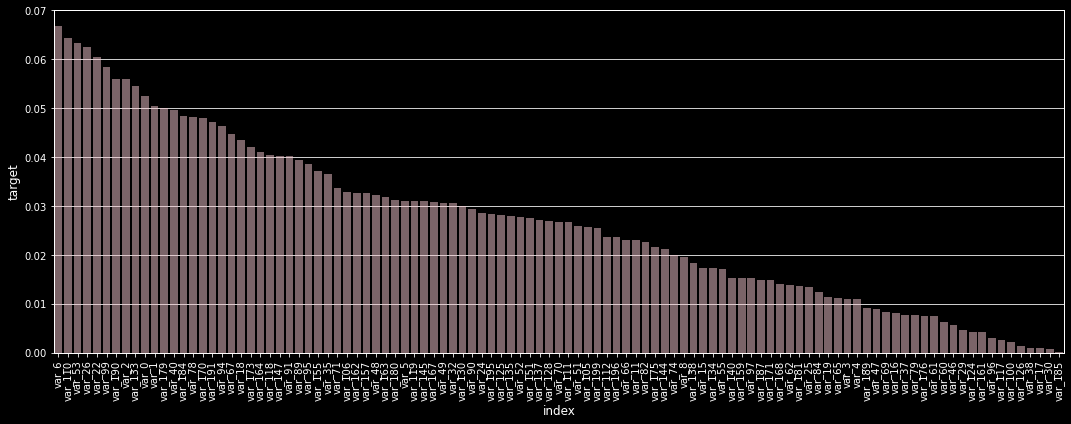

In [153]:
bar_plot(descendent_corr[descendent_corr.target > 0][1:])

# Resampling

## Undersampling

In [33]:
train = train.set_index('ID_code')

In [87]:
def undersampler(df, target):
    
    len_yes = len(df.loc[df[target] == 1])
    index_no = df[df[target] == 0].index
    random_index = np.random.choice(index_no, len_yes)
    index_yes = df[df[target]==1].index
    under_sample_indices = np.concatenate([index_yes, random_index])
    under_sample = df.loc[under_sample_indices]
    return under_sample

In [ ]:
under_sample = undersampler(train, 'target')

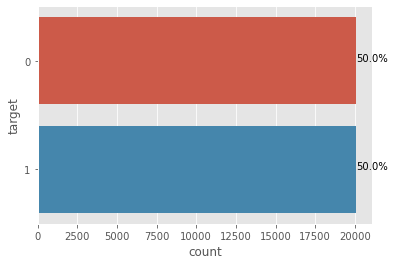

In [91]:
binary_target_plot(under_sample, 'target')

In [164]:
under_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40196 entries, train_13 to train_87313
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 63.2+ MB


# PCA